In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sentences1, sentences2, predictions, attentions = pickle.load(open('attention_results.pkl', 'rb'))

In [3]:
predictions

[array([0]), array([2]), array([0]), array([0]), array([0])]

In [4]:
sentences1

['A man in a blue shirt standing in front of a garage-like structure painted with geometric designs',
 'A Little League team tries to catch a runner sliding into a base in an afternoon game',
 'A person on a horse jumps over a broken down airplane',
 'Children smiling and waving at camera',
 'A boy is jumping on skateboard in the middle of a red bridge']

In [11]:
i=0
sent1, sent2 = sentences1[i], sentences2[i]
sent1_w, sent2_w = [w for w in sent1.split()], [w for w in sent2.split()]
len1, len2 = len(sent1_w), len(sent2_w)

print(sent1_w)
print(sent2_w)
print(len1, len2)

['A', 'man', 'in', 'a', 'blue', 'shirt', 'standing', 'in', 'front', 'of', 'a', 'garage-like', 'structure', 'painted', 'with', 'geometric', 'designs']
['A', 'man', 'is', 'wearing', 'a', 'blue', 'shirt']
17 7


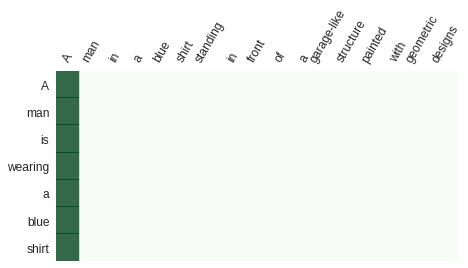

In [12]:
attention = attentions[i][:len2, :len1]

column_labels = sent1_w
row_labels = sent2_w
data = attention

# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Greens, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(5.5*len1/13, 3*len2/6)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

# rotate the
plt.xticks(rotation=60)

plt.tick_params(axis='both', which='major', labelsize=12)

ax.grid(False)

# Turn off all the ticks
#ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

plt.show()